# Credit Risk Modelling using Machine Learning 

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
sns.set_style("whitegrid")

In [10]:
df=pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


- This is usually an index column automatically created when reading a CSV.we don’t really need it for analysis;so am dropping.. 

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
df.shape

(1000, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [14]:
df["Age"].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [15]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [16]:
df['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [17]:
df['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [18]:
df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [19]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [20]:
df['Saving accounts'].value_counts(dropna=False)    # NaN 183

Saving accounts
little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [21]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [22]:
df['Checking account'].value_counts(dropna=False)   # NaN 394

Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [23]:
df['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

In [24]:
df['Duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [25]:
#df['Duration'].value_counts()

In [26]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [27]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [28]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df = df.dropna().reset_index(drop=True)

In [31]:
df.shape

(522, 10)

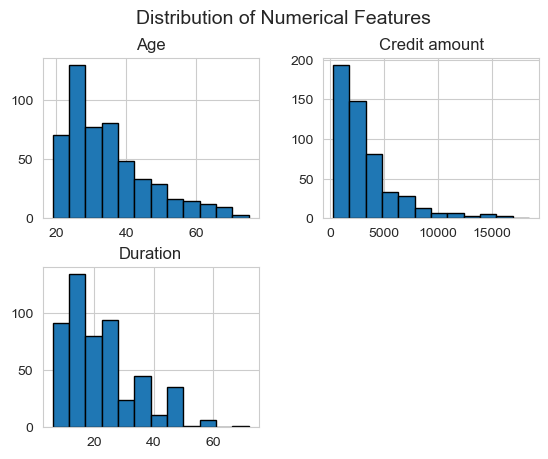

In [32]:
df[['Age','Credit amount','Duration']].hist(bins=12,edgecolor='black')
plt.suptitle("Distribution of Numerical Features",fontsize=14)
plt.show()

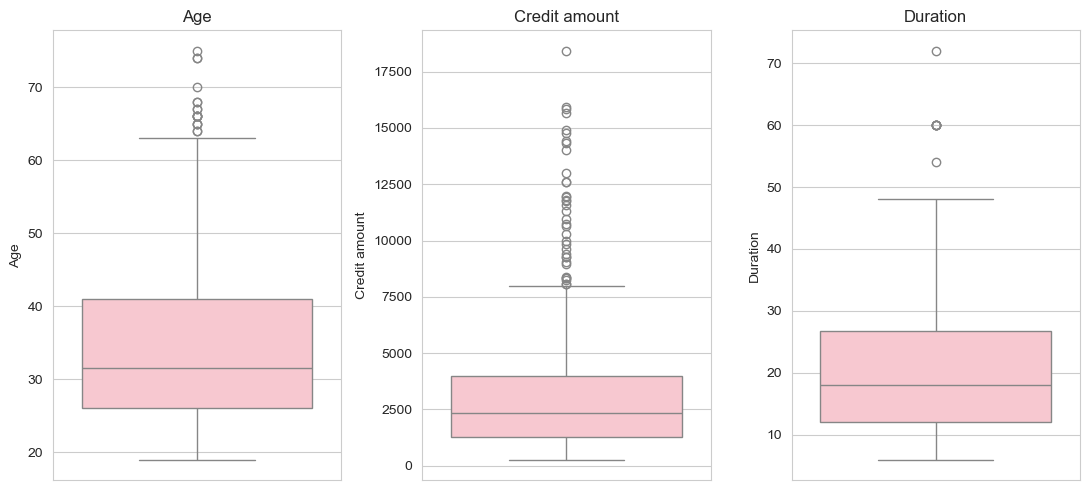

In [33]:
plt.figure(figsize=(11,5))
for i ,col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="pink")
    plt.title(col)

plt.tight_layout()
plt.show()

In [34]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [35]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [36]:
categorical_columns=['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose']

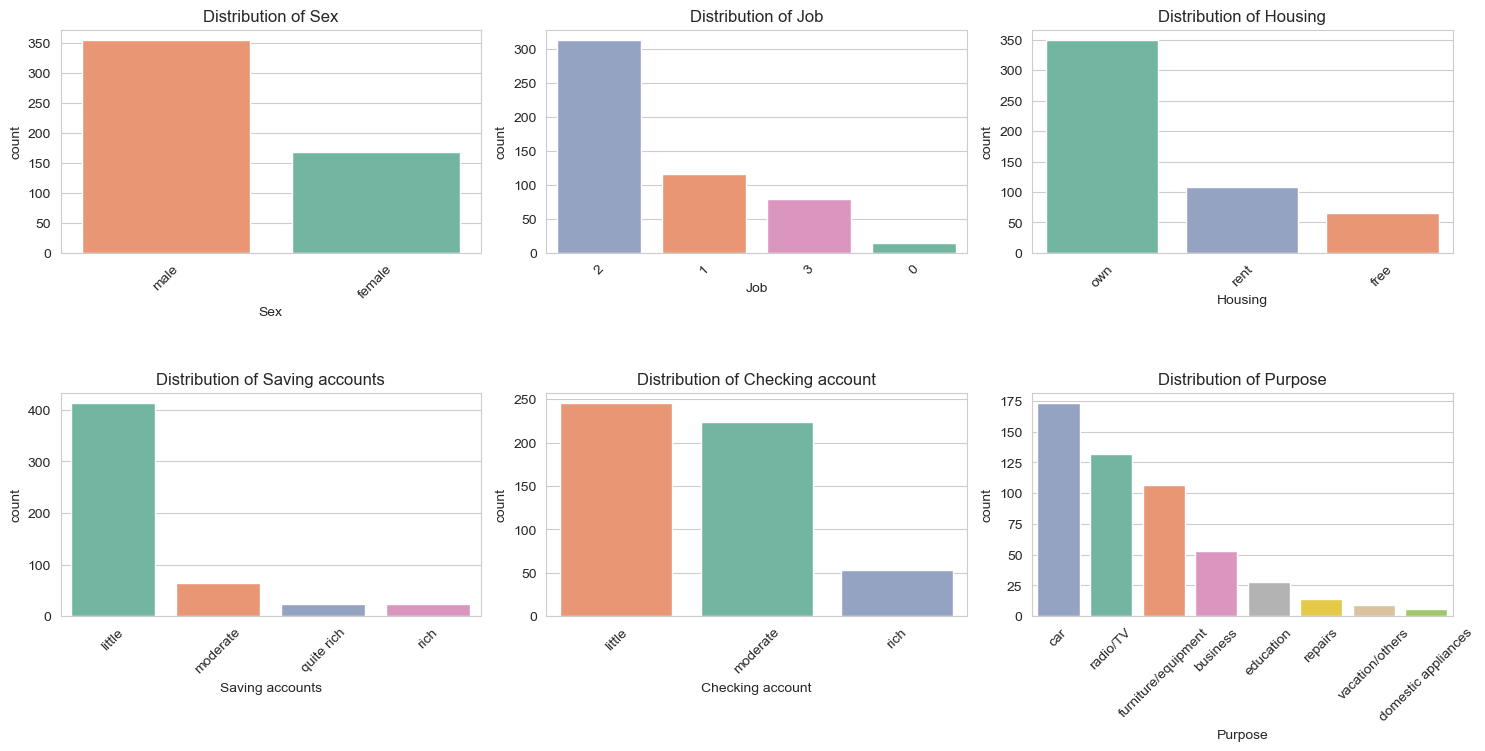

In [37]:
plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue=col,palette='Set2',order = df[col].value_counts().index,legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
corr = df[['Age', 'Job','Credit amount', 'Duration']].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


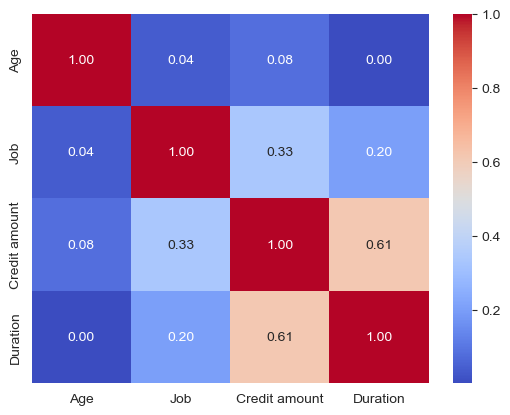

In [39]:
sns.heatmap(corr,annot=True,cmap = 'coolwarm', fmt=".2f")
plt.show()

In [40]:
df.groupby("Job")['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [41]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [42]:
pd.pivot_table(df, values='Credit amount',index = 'Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


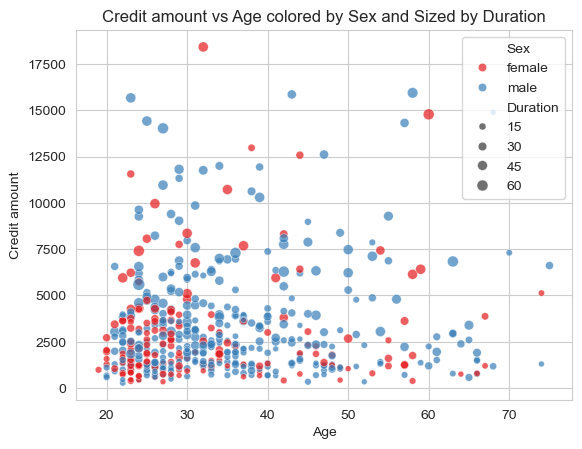

In [43]:
sns.scatterplot(data=df ,x='Age',y='Credit amount',hue='Sex',size='Duration',alpha=0.7,palette='Set1')
plt.title('Credit amount vs Age colored by Sex and Sized by Duration')
plt.show()

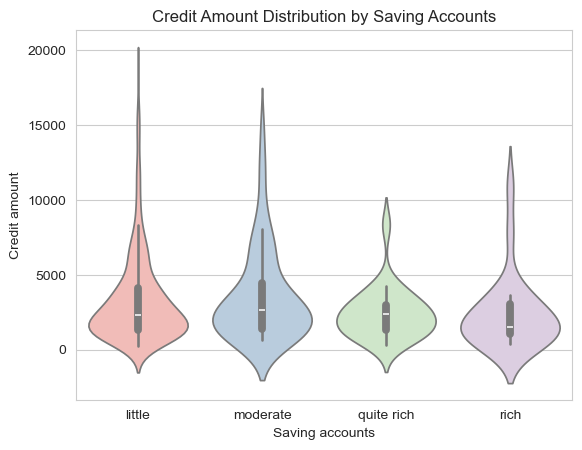

In [44]:
sns.violinplot(data = df, x='Saving accounts', y='Credit amount',hue='Saving accounts', palette='Pastel1',legend=False)
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [45]:
df['Risk'].value_counts(normalize=True) * 100


Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

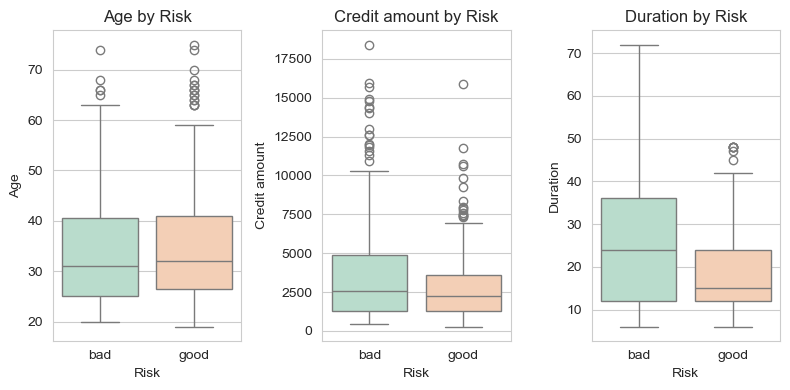

In [46]:
plt.figure(figsize=(8,4))
for i,col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x= 'Risk',y= col,hue='Risk', palette='Pastel2',legend=False)
    plt.title(f'{col} by Risk')

plt.tight_layout()
plt.show()

In [47]:
df.groupby('Risk')[['Age','Credit amount','Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


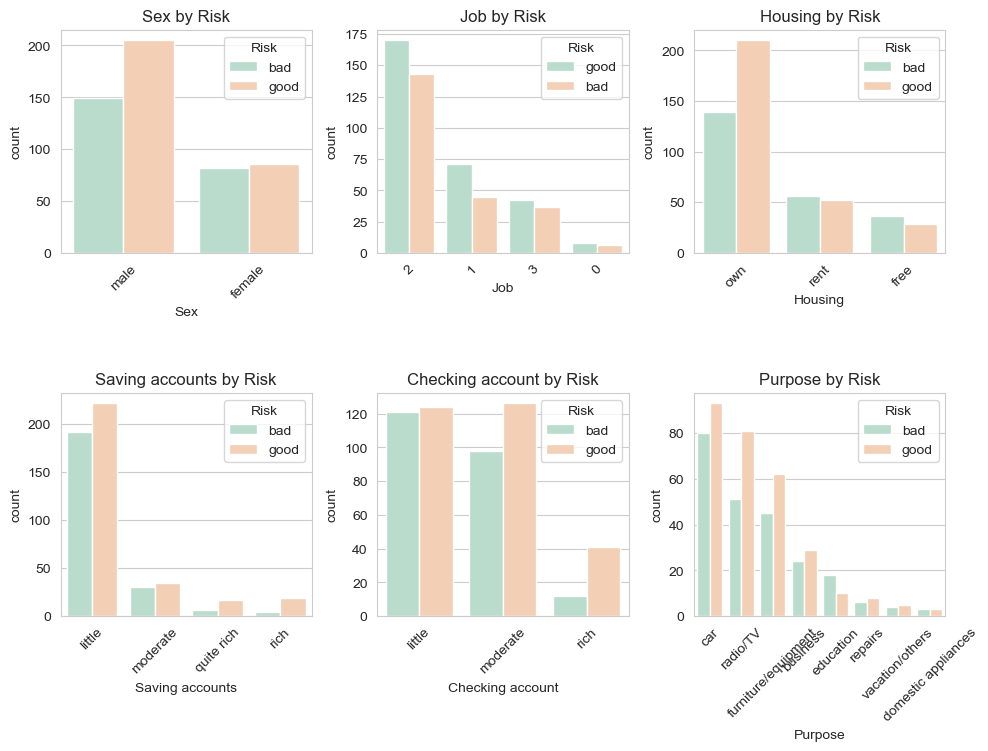

In [48]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x= col,hue='Risk', palette='Pastel2',order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [50]:
features=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']

In [51]:
target='Risk'

In [52]:
df_model = df[features + [target]].copy()

In [53]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [54]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [55]:
cat_cols=df_model.select_dtypes(include='object').columns.drop('Risk')

In [56]:
le_dict={}

In [57]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [58]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f'{col}_encoder.pkl')

In [59]:
le_target = LabelEncoder()

In [60]:
target

'Risk'

In [61]:
df_model[target] = le_target.fit_transform(df_model[target])

In [62]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [63]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [64]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df_model.drop(target,axis=1)

In [67]:
y = df_model[target]

In [68]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [69]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y, random_state=1)

In [71]:
X_train.shape

(417, 8)

In [72]:
X_test.shape

(105, 8)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [91]:
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid=GridSearchCV(model,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    return best_model ,acc , grid.best_params_

In [92]:
dt = DecisionTreeClassifier(random_state = 1,class_weight = 'balanced')
dt_param_grid = {
    "max_depth" : [3,5,7,10,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [93]:
best_dt, acc_dt, params_dt = train_model(dt,dt_param_grid,X_train,y_train,X_test,y_test)

In [94]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.580952380952381


In [95]:
print("Best parameters",params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [96]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [97]:
rf_param_grid={
    'n_estimators': [100,200],
    'max_depth' : [5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [98]:
best_rf, acc_rf, params_rf = train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [99]:
print("Random Forest Accuracy",acc_rf)

Random Forest Accuracy 0.6190476190476191


In [100]:
print("Best parameters",params_rf)

Best parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [101]:
et = ExtraTreesClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [102]:
et_param_grid={
    'n_estimators': [100,200],
    'max_depth' : [5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [103]:
best_et, acc_et, params_et = train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [104]:
print("Extra Tree Accuracy",acc_et)

Extra Tree Accuracy 0.6476190476190476


In [105]:
print("Best parameters",params_et)

Best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [106]:
xgb = XGBClassifier(random_state = 1,scale_pos_weight = (y_train == 0).sum() / (y_train ==1).sum(),use_label_encoder=False,eval_metric='logloss')

In [107]:
xgb_param_grid={
    'n_estimators': [100,200],
    'max_depth' : [3,5,7],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.7,1],
    'colsample_bytree' : [0.7,1]
}

In [108]:
best_xgb, acc_xgb, params_xgb = train_model(xgb,xgb_param_grid,X_train,y_train,X_test,y_test)

C:\Users\siree\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:09:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [109]:
print("XGB Accuracy",acc_xgb)

XGB Accuracy 0.6666666666666666


In [110]:
print("Best parameters",params_xgb)

Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [111]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [112]:
joblib.dump(best_et,"extra_tress_credit_model.pkl")

['extra_tress_credit_model.pkl']